# <center> LAB 6 - Quadratic Equation – Classic – Po Shen Loh </center>
<center>Harold Alfredo Díaz Ortiz</center>

## Ejercicio 1

Plot the following functions in a x range that include that include the vertex and the roots (if there are roots).
- x^2
- (x–1)^2
- x^2 – 1
- x^2 + 1

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import math

def plot_function(x, y, title=" ", y_limit=[-0.1, 1.1]):
  fig, ax = plt.subplots()
  plt.ylim(y_limit)
  ax.plot(x, y)
  ax.grid(True, which='both')
  ax.axhline(y=0, color='k')
  ax.axvline(x=0, color='k')
  plt.title(title)
  plt.xlabel('x')
  plt.ylabel('f(x)')

x_1, x_2, x_3, x_4 = 0, 0, 0, 0
y_functions = [None]*4

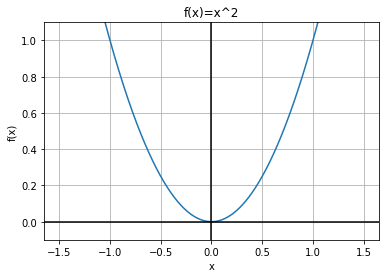

In [16]:
x_1 = np.linspace(-1.5, 1.5, 1000)
y_functions[0] = x_1**2
plot_function(x_1, y_functions[0], 'f(x)=x^2')

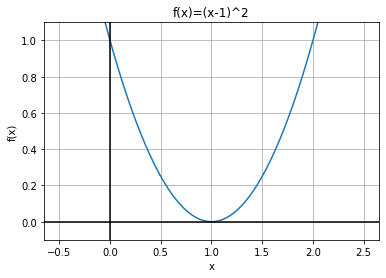

In [17]:
x_2 = np.linspace(-0.5, 2.5, 1000)
y_functions[1] = (x_2-1)**2
plot_function(x_2, y_functions[1], 'f(x)=(x-1)^2')

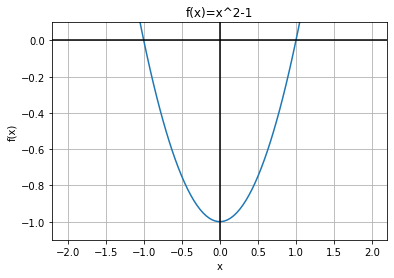

In [18]:
x_3 = np.linspace(-2, 2, 100)
y_functions[2] = x_3**2 - 1
plot_function(x_3, y_functions[2], 'f(x)=x^2-1', [-1.1, 0.1])

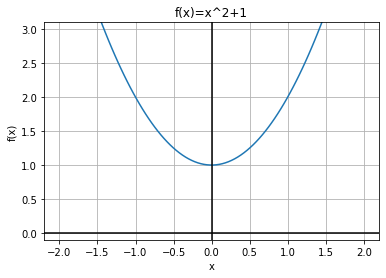

In [19]:
x_4 = np.linspace(-2, 2, 100)
y_functions[3] = x_4**2 + 1
plot_function(x_4, y_functions[3], 'f(x)=x^2+1', [-0.1, 3.1])

## Ejercicio 2
Apply the Classic and Po Shen Loh ‘s methods for solving the following quadratic equations
- x^2 = 0
- (x–1)^2 = 0
- x^2 – 1 = 0
- x^2 + 1 = 0

In [25]:
def classic_quad(b, c, a=1):
  d = ((b**2) - (4*a*c))**(1/2)
  x_1 = (-b+d)/(2*a)
  x_2 = (-b-d)/(2*a)
  return x_1, x_2

def po_shen_quad(b, c):
  #b, c = float(b), float(c)
  u = ((b**2)/4 - c)**(1/2)
  r = -b/2 + u
  s = -b/2 - u
  return r, s

In [26]:
print(classic_quad(0, 0))
print(po_shen_quad(0, 0))

(0.0, 0.0)
(0.0, 0.0)


In [27]:
print(classic_quad(-2, 1))
print(po_shen_quad(-2, 1))

(1.0, 1.0)
(1.0, 1.0)


In [28]:
print(classic_quad(0, -1))
print(po_shen_quad(0, -1))

(1.0, -1.0)
(1.0, -1.0)


In [29]:
print(classic_quad(0, 1))
print(po_shen_quad(0, 1))

((6.123233995736766e-17+1j), (-6.123233995736766e-17-1j))
((6.123233995736766e-17+1j), (-6.123233995736766e-17-1j))


## Ejercicio 3
to plot the newton fractals for the corresponding complex quadratic polynomials
- z^2
- (z–1)^2
- z^2 – 1
- z^2 + 1

### $f(z) = z^2$


In [39]:
def f(z):
    return z ** 2

def df(z):
    return 2 * z

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 0
    #r2 = -1

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    '''if abs(znext - z) < eps: # stop when close enough to any root
                        break'''
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

In [40]:
def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


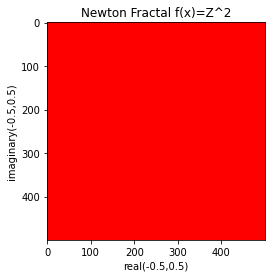

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


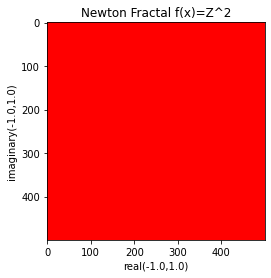

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


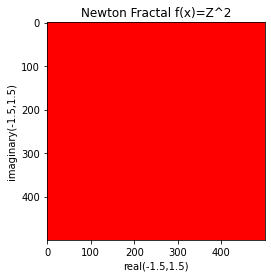

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


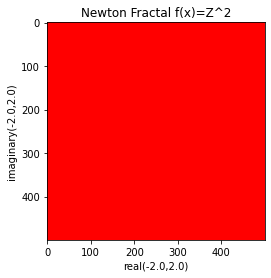

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


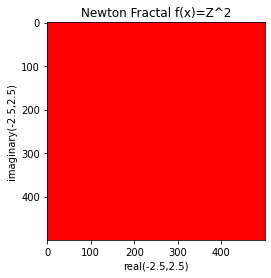

In [41]:
print("zoom out")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


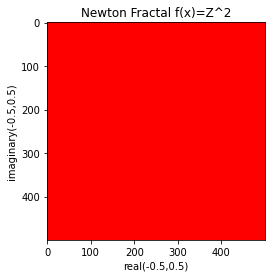

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


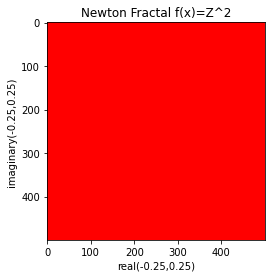

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


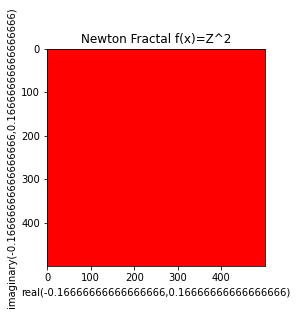

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


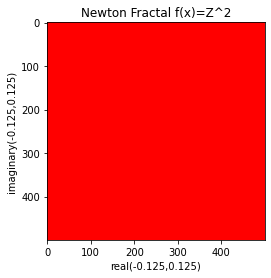

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


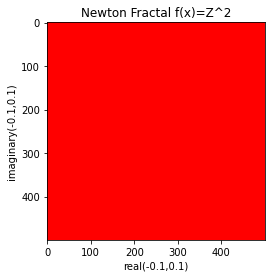

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


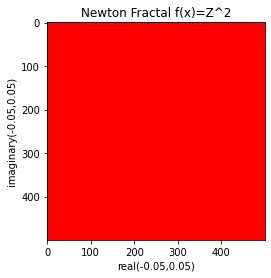

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


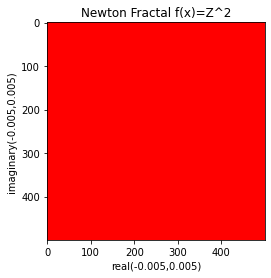

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


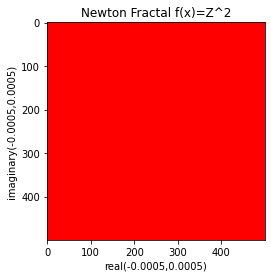

In [42]:
print("zoom in")
display1(zoom=1)
display1(zoom=1/2)
display1(zoom=1/3)
display1(zoom=1/4)
display1(zoom=1/5)
display1(zoom=1/10)
display1(zoom=1/100)
display1(zoom=1/1000)

### $f(z) = (z-1)^2$

In [43]:
def f(z):
    return (z-1) ** 2

def df(z):
    return 2 * z - 2

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1
    #r2 = -1

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    '''if abs(znext - z) < eps: # stop when close enough to any root
                        break'''
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

In [44]:
def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=(Z-1)^2')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


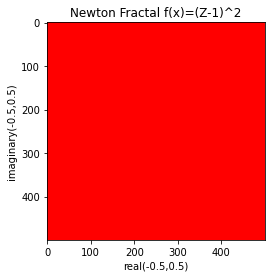

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


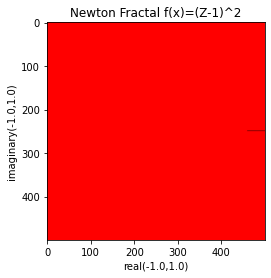

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


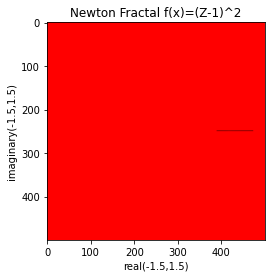

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


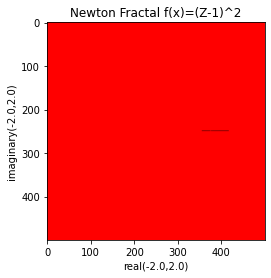

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


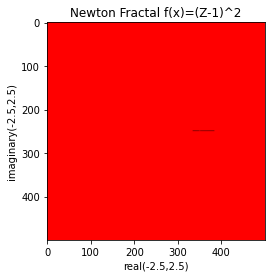

In [45]:
print("zoom out")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


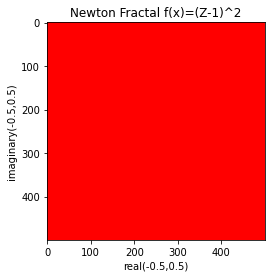

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


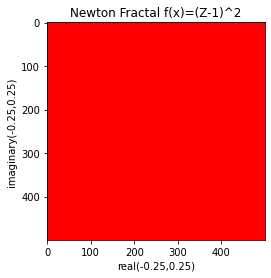

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


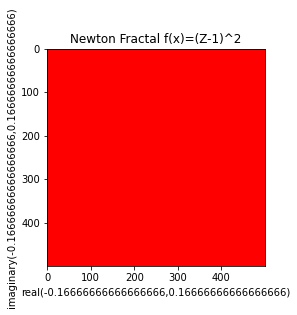

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


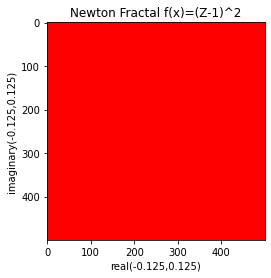

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


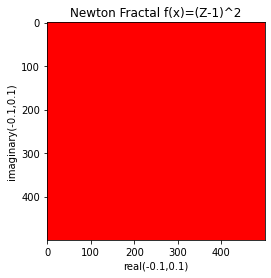

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


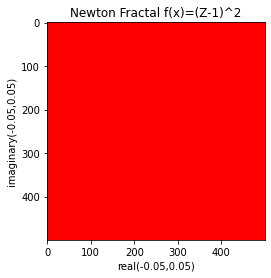

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


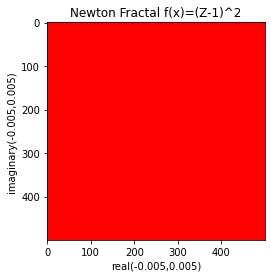

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


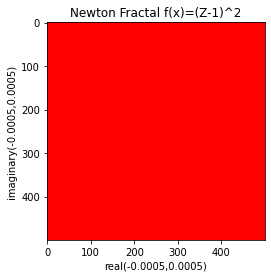

In [46]:
print("zoom in")
display1(zoom=1)
display1(zoom=1/2)
display1(zoom=1/3)
display1(zoom=1/4)
display1(zoom=1/5)
display1(zoom=1/10)
display1(zoom=1/100)
display1(zoom=1/1000)

### $f(z) = z^2 – 1$

In [47]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return z ** 2 - 1

def df(z):
    return 2 * z

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1
    r2 = -1

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

In [48]:
def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2-1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


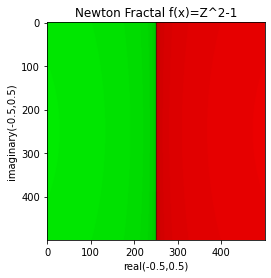

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


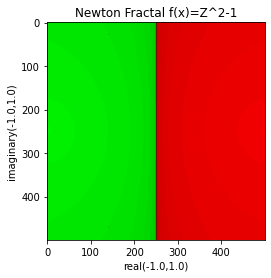

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


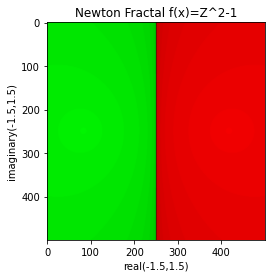

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


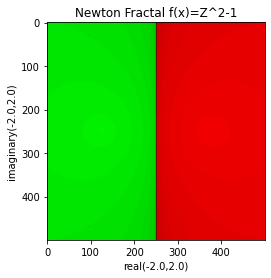

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


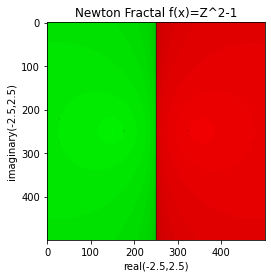

In [49]:
print("zoom out")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


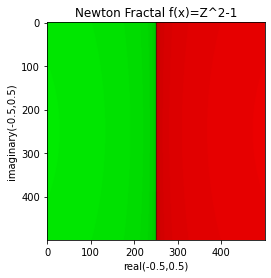

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


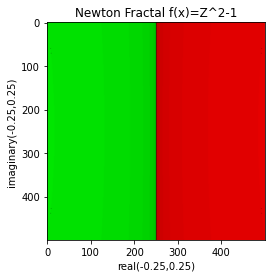

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


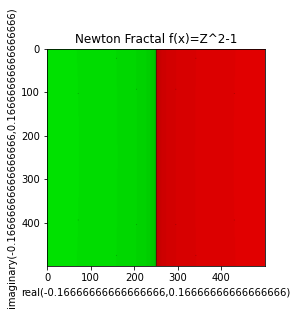

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


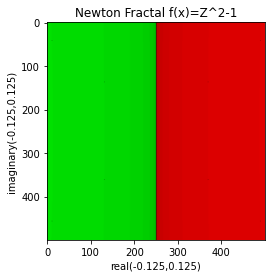

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


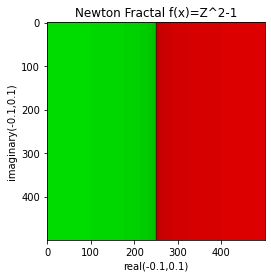

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


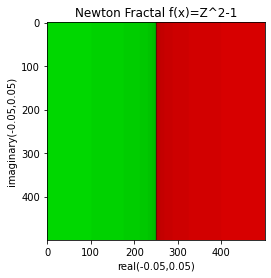

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


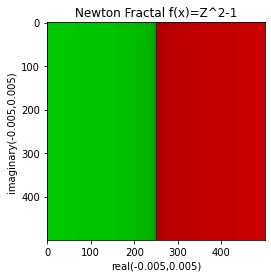

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


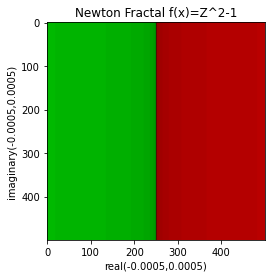

In [50]:
print("zoom in")
display1(zoom=1)
display1(zoom=1/2)
display1(zoom=1/3)
display1(zoom=1/4)
display1(zoom=1/5)
display1(zoom=1/10)
display1(zoom=1/100)
display1(zoom=1/1000)

### $f(z) = z^2 + 1$

In [51]:
def f(z):  #Funcion 
    return z**2 + 1

def df(z):
    return 2*z

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256, m=1):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = complex(0.0, 1.0)
    r2 = complex(0.0, -1.0)

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - m*f(z) / dz # Newton iteration (m es la multiplicidad del polinomio)

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

In [52]:
def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256, m=1):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter, m=m)
    plt.title('Newton Fractal f(x)=Z^2 - 1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


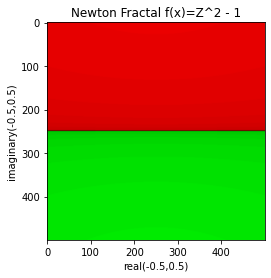

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


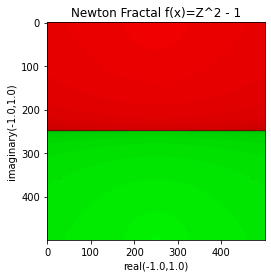

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


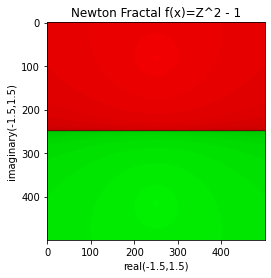

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


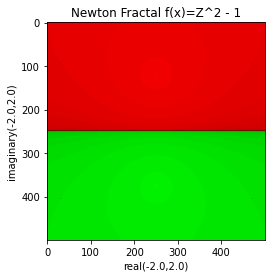

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


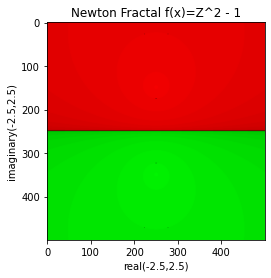

In [53]:
print("zoom out")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


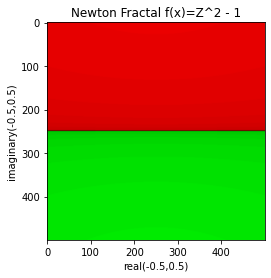

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


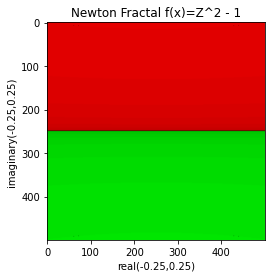

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


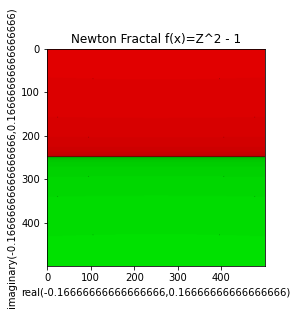

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


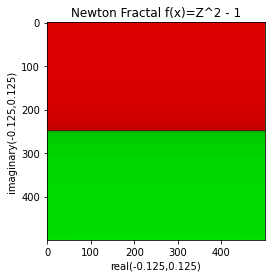

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


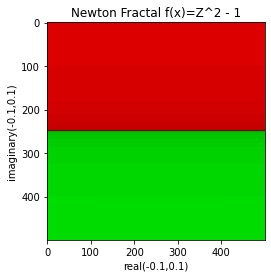

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


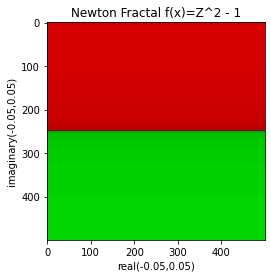

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


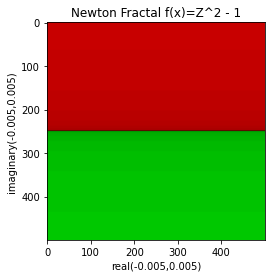

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


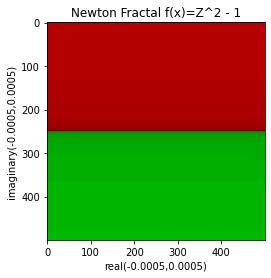

In [54]:
print("zoom in")
display1(zoom=1)
display1(zoom=1/2)
display1(zoom=1/3)
display1(zoom=1/4)
display1(zoom=1/5)
display1(zoom=1/10)
display1(zoom=1/100)
display1(zoom=1/1000)

## Ejercicio 4
Plot the Newton iterates for points on the positive and negative axes for the complex quadratic polynomials in 3. Give an interpretation of the results.

### $f(z) = z^2$

In [98]:
def f_1(z):
    return z ** 2

def df_1(z):
    return 2 * z

#### Newton iterates form $z=10.0 + 0.0j$

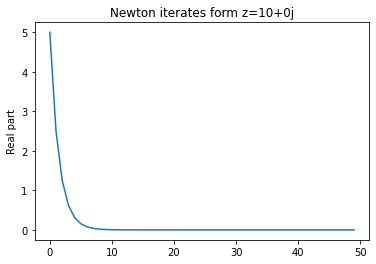

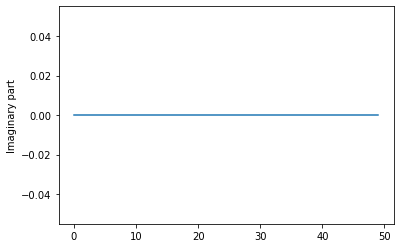

In [99]:
z=10.0 + 0.0j
label = str(z)[1:len(str(z))-1]
r=[]
i=[]

for k in range(50):
  dz = df_1(z)
  z = z - f_1(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form $z=-10.0 + 0.0j$

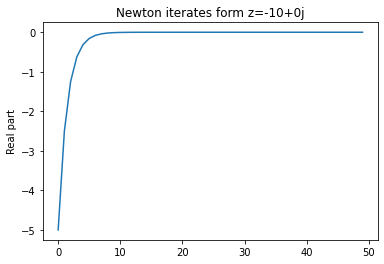

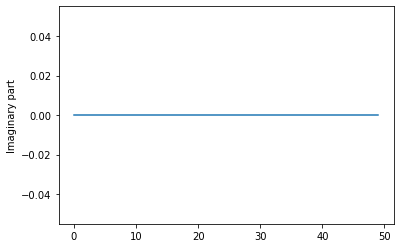

In [100]:
z=-10.0 + 0.0j
label = str(z)[1:len(str(z))-1]
r=[]
i=[]

for k in range(50):
  dz = df_1(z)
  z = z - f_1(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form $z=0.0 + 10.0j$

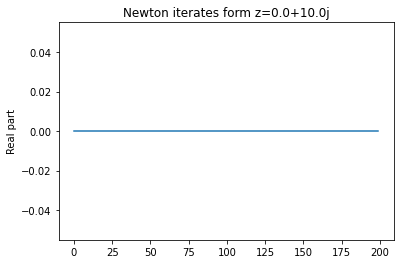

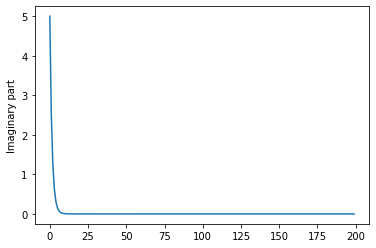

In [101]:
z=0.0 + 10.0j
label = "0.0+10.0j"
r=[]
i=[]

for k in range(200):
  dz = df_1(z)
  z = z - f_1(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form $z=0.0 - 10.0j$

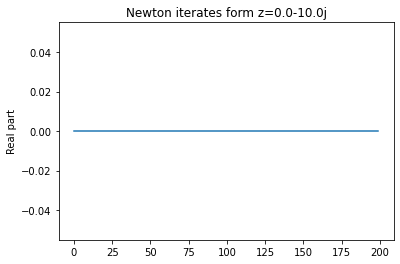

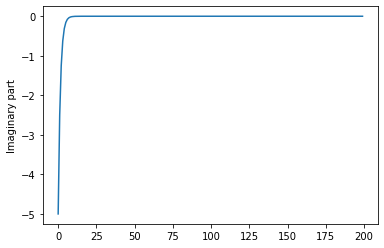

In [102]:
z=0.0 - 10.0j
label = "0.0-10.0j"
r=[]
i=[]

for k in range(200):
  dz = df_1(z)
  z = z - f_1(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### **Análisis**

En las gráficas con el eje real, se observa que tanto en un $z$ positivo como negativo, la parte real converge a la raíz del polinomio $(z=0)$, mientras la parte imaginaria se mantiene en 0. En las gráficas con el eje imaginario sucede lo contrario: mientras en la parte real la gráfica se mantiene en 0, en la imaginaria converge a 0 independientemente del signo de $z$.

### $f(z) = (z-1)^2$

In [103]:
def f_2(z):
    return (z-1) ** 2

def df_2(z):
    return 2 * (z-1)

#### Newton iterates form $z=10.0 + 0.0j$

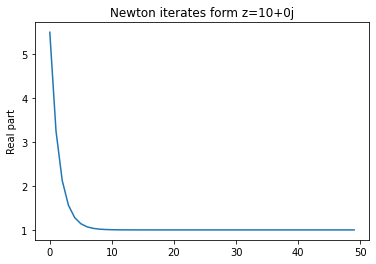

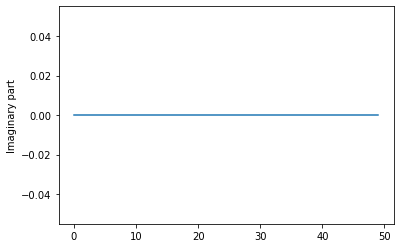

In [104]:
z=10.0 + 0.0j
label = str(z)[1:len(str(z))-1]
r=[]
i=[]

for k in range(50):
  dz = df_2(z)
  z = z - f_2(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form $z=-10.0 + 0.0j$

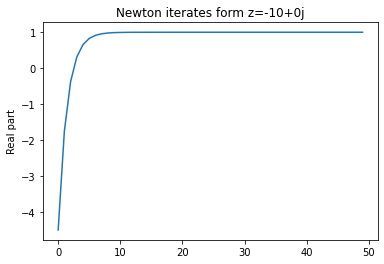

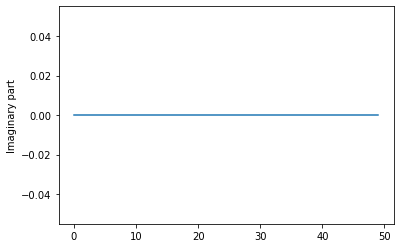

In [105]:
z=-10.0 + 0.0j
label = str(z)[1:len(str(z))-1]
r=[]
i=[]

for k in range(50):
  dz = df_2(z)
  z = z - f_2(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form $z=0.0 + 10.0j$

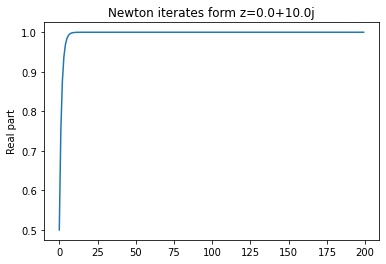

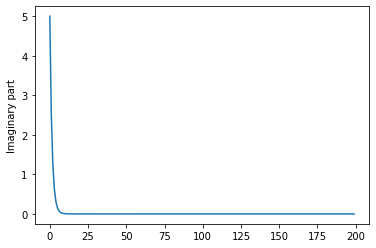

In [106]:
z=0.0 + 10.0j
label = "0.0+10.0j"
r=[]
i=[]

for k in range(200):
  dz = df_2(z)
  z = z - f_2(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form $z=0.0 - 10.0j$

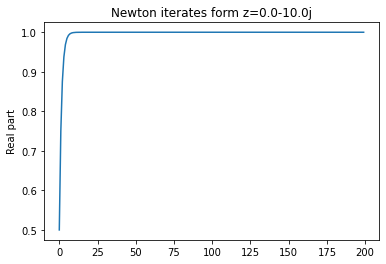

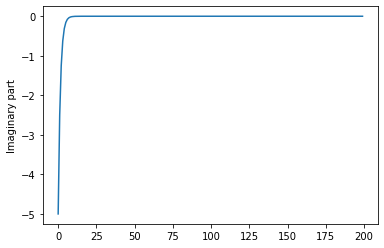

In [144]:
z=0.0 - 10.0j
label = "0.0-10.0j"
r=[]
i=[]

for k in range(200):
  dz = df_2(z)
  z = z - f_2(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### **Análisis**

En las gráficas con el eje real, se observa que tanto en un $z$ positivo como negativo, la parte real converge a la raíz del polinomio $(z=1)$, mientras la parte imaginaria se mantiene en 0. En las gráficas con el eje imaginario, mientras en la parte real la gráfica converge a la raíz del polinomio, en la imaginaria converge a 0. 


### $f(z) = z^2 - 1$

In [108]:
def f_3(z):
    return z ** 2 - 1

def df_3(z):
    return 2 * z

#### Newton iterates form $z=10.0 + 0.0j$

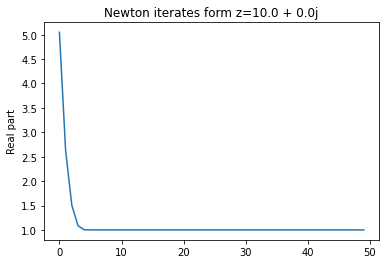

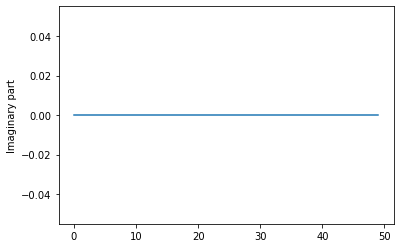

In [109]:
z=10.0 + 0.0j
r=[]
i=[]

for k in range(50):
  dz = df_3(z)
  z = z - f_3(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form $z=-10.0 + 0.0j$

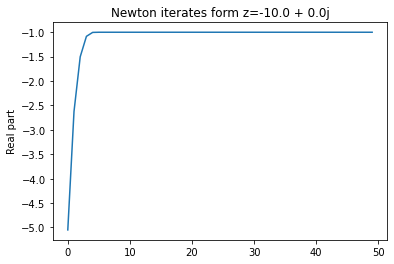

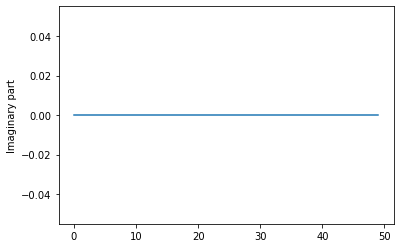

In [110]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df_3(z)
  z = z - f_3(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form $z=0.0 + 10.0j$

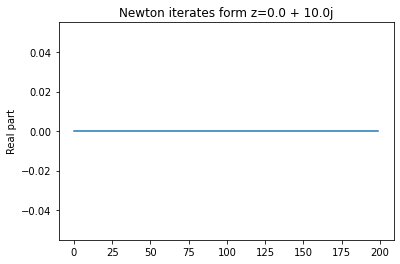

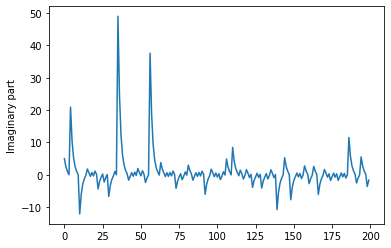

In [111]:
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df_3(z)
  z = z - f_3(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form $z=0.0 - 10.0j$

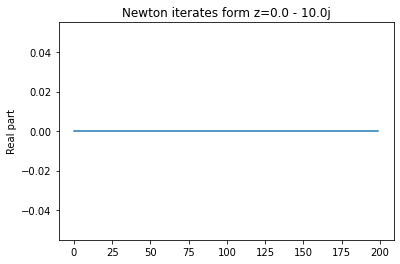

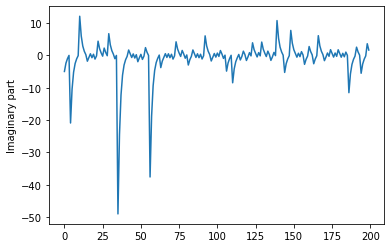

In [112]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df_3(z)
  z = z - f_3(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### **Análisis**

En las gráficas con el eje real, se observa que si en la parte real $z<0$, la gráfica converge a la raíz negativa del polinomio $(z=-1)$, y que si $z>0$, la gráfica converge a la raíz positiva del polinomio $(z=1)$. En la parte imaginaria, $z$ se mantiene en 0. Ahora bien, en las gráficas con el eje imaginario, mientras la parte real se mantiene en 0, la parte imaginaria es divergente en todo punto.

### $f(z) = z^2 + 1$

In [113]:
def f_4(z):
    return z ** 2 + 1

def df_4(z):
    return 2 * z

#### Newton iterates form $z=10.0 + 0.0j$

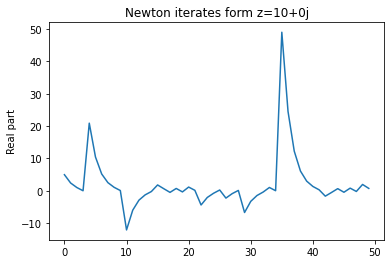

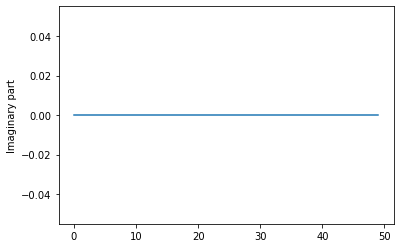

In [114]:
z=10.0 + 0.0j
label = str(z)[1:len(str(z))-1]
r=[]
i=[]

for k in range(50):
  dz = df_4(z)
  z = z - f_4(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form $z=-10.0 + 0.0j$

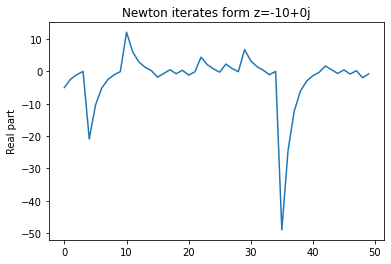

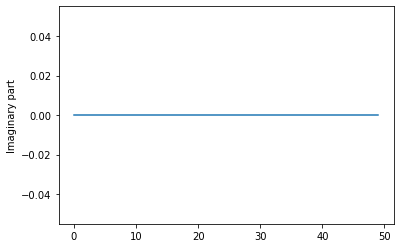

In [115]:
z=-10.0 + 0.0j
label = str(z)[1:len(str(z))-1]
r=[]
i=[]

for k in range(50):
  dz = df_4(z)
  z = z - f_4(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form $z=0.0 + 10.0j$

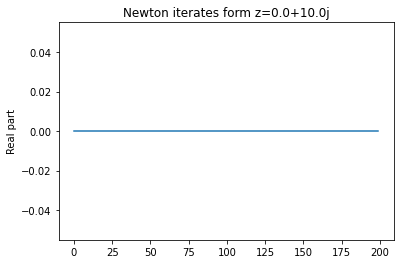

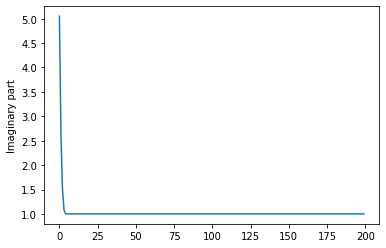

In [116]:
z=0.0 + 10.0j
label = "0.0+10.0j"
r=[]
i=[]

for k in range(200):
  dz = df_4(z)
  z = z - f_4(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form $z=0.0 - 10.0j$

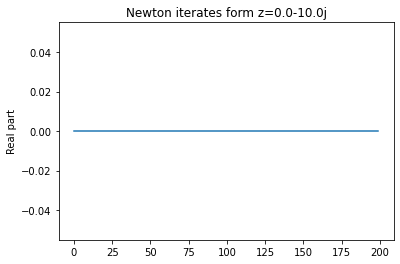

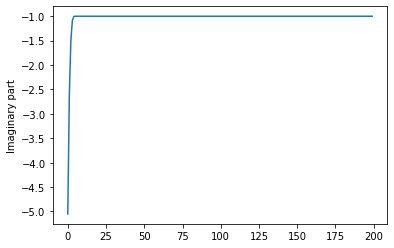

In [117]:
z=0.0 - 10.0j
label = "0.0-10.0j"
r=[]
i=[]

for k in range(200):
  dz = df_4(z)
  z = z - f_4(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### **Análisis**

En las gráficas con el eje real, se observa que la parte real es divergente en todo punto, mientras la parte imaginaria $z$ se mantiene en 0. En las gráficas con el eje imaginario, mientras en la parte real $z$ se mantiene en 0, en la parte imaginaria converge: a 1 si $z>0$, y a -1 si $z<0$.

## Ejercicio 5
Plot the Newton iterates for points on the diagonals in the four quadrants and 0.0 + 0.0j for the complex quadratic polynomials in 3. Give an interpretation of the results.

### $f(z) = z^2$

#### Newton iterates form $z=10.0 + 10.0j$

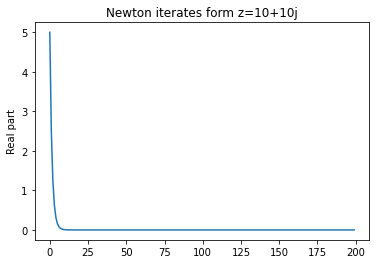

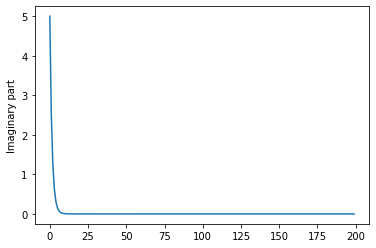

In [124]:
z=10.0 + 10.0j
label = str(z)[1:len(str(z))-1]
r=[]
i=[]

for k in range(200):
  dz = df_1(z)
  z = z - f_1(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form $z=10.0 - 10.0j$

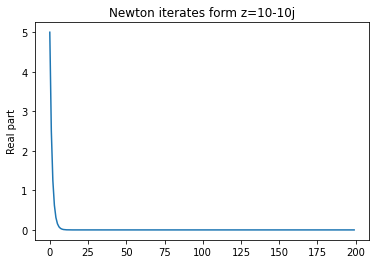

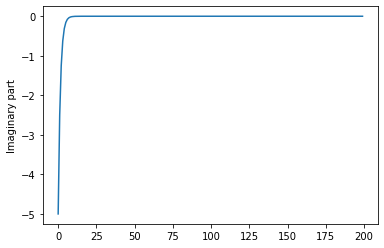

In [125]:
z=10.0 - 10.0j
label = str(z)[1:len(str(z))-1]
r=[]
i=[]

for k in range(200):
  dz = df_1(z)
  z = z - f_1(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form $z=-10.0 + 10.0j$

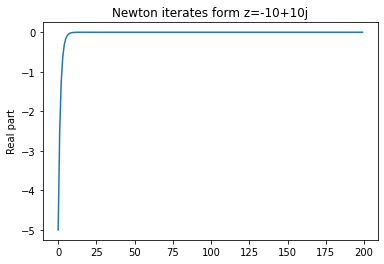

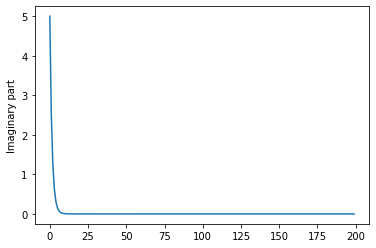

In [126]:
z=-10.0 + 10.0j
label = str(z)[1:len(str(z))-1]
r=[]
i=[]

for k in range(200):
  dz = df_1(z)
  z = z - f_1(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form $z=-10.0 - 10.0j$

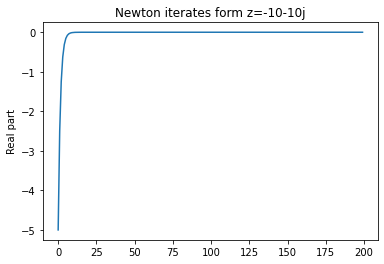

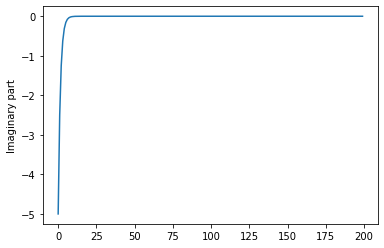

In [127]:
z=-10.0 - 10.0j
label = str(z)[1:len(str(z))-1]
r=[]
i=[]

for k in range(200):
  dz = df_1(z)
  z = z - f_1(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form $z=0.0 + 0.0j$

Division by 0


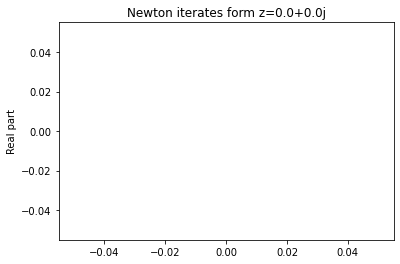

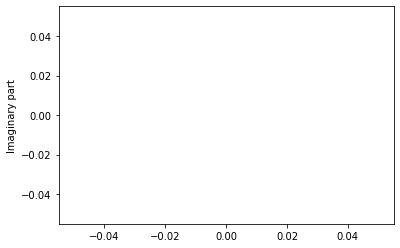

In [128]:
z=0.0 + 0.0j
label = "0.0+0.0j"
r=[]
i=[]

for k in range(200):
  dz = df_1(z)
  try:
    z = z - f_1(z) / dz # Newton iteration
  except:
    print("Division by 0")
    break
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### **Análisis**

Sin importar el signo ni el eje, la parte real convergerá a 1 y la parte imaginaria convergerá a 0. En $z = 0.0 + 0.0j$ se generará un error de división por 0, dado que al asignar la iteracion de Newton z = z - f(z)/dz tenemos que dz es $2z=0$.

### $f(z) = (z-1)^2$

#### Newton iterates form $z=10.0 + 10.0j$

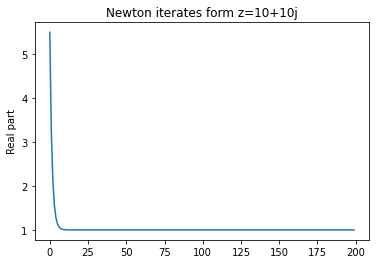

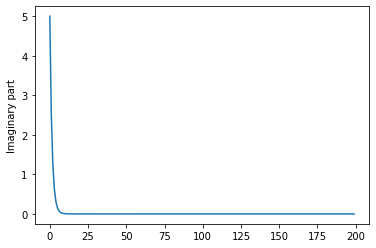

In [129]:
z=10.0 + 10.0j
label = str(z)[1:len(str(z))-1]
r=[]
i=[]

for k in range(200):
  dz = df_2(z)
  z = z - f_2(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form $z=10.0 - 10.0j$

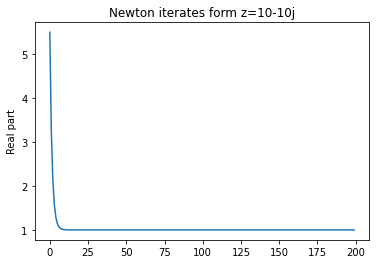

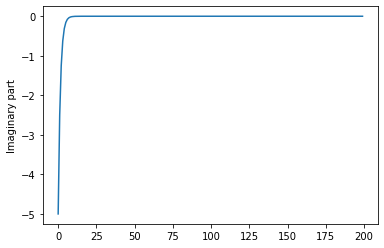

In [130]:
z=10.0 - 10.0j
label = str(z)[1:len(str(z))-1]
r=[]
i=[]

for k in range(200):
  dz = df_2(z)
  z = z - f_2(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form $z=-10.0 + 10.0j$

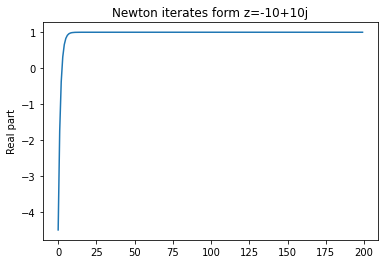

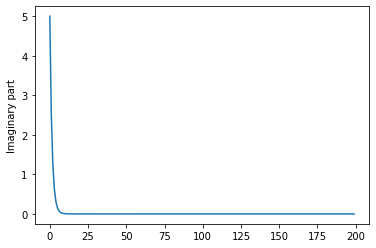

In [131]:
z=-10.0 + 10.0j
label = str(z)[1:len(str(z))-1]
r=[]
i=[]

for k in range(200):
  dz = df_2(z)
  z = z - f_2(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form $z=-10.0 - 10.0j$

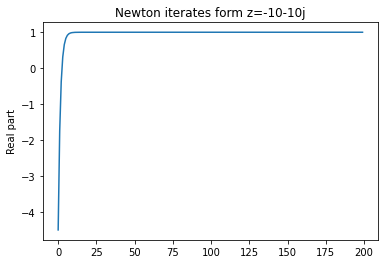

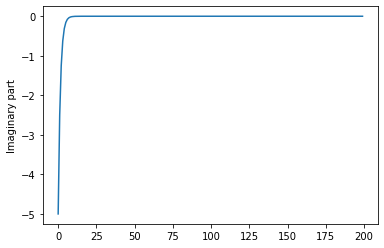

In [132]:
z=-10.0 - 10.0j
label = str(z)[1:len(str(z))-1]
r=[]
i=[]

for k in range(200):
  dz = df_2(z)
  z = z - f_2(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form $z=0.0 + 0.0j$

Division by 0


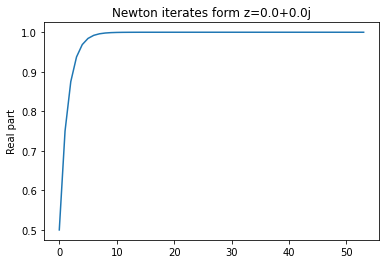

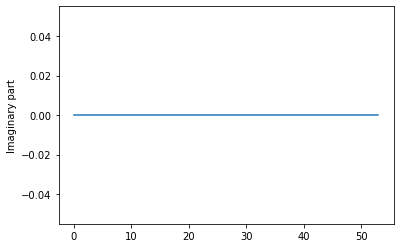

In [133]:
z=0.0 + 0.0j
label = "0.0+0.0j"
r=[]
i=[]

for k in range(200):
  dz = df_2(z)
  try:
    z = z - f_2(z) / dz # Newton iteration
  except:
    print("Division by 0")
    break
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### **Análisis**

Sin importar el signo ni el eje, la parte real convergerá a 1 y la parte imaginaria convergerá a 0. En $z = 0.0 + 0.0j$ se generará un error de división por 0, dado que al asignar la iteracion de Newton z = z - f(z)/dz tenemos que dz es $2z=0$.

### $f(z) = z^2 - 1$

#### Newton iterates form $z=10.0 + 10.0j$

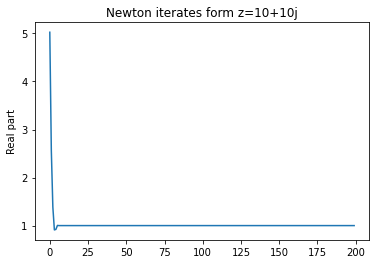

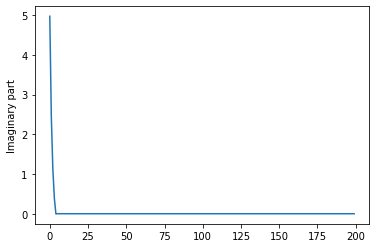

In [134]:
z=10.0 + 10.0j
label = str(z)[1:len(str(z))-1]
r=[]
i=[]

for k in range(200):
  dz = df_3(z)
  z = z - f_3(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form $z=10.0 - 10.0j$

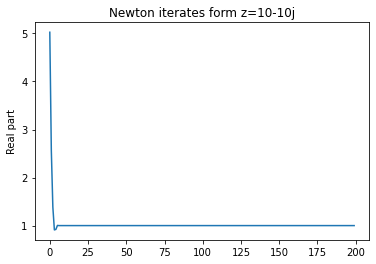

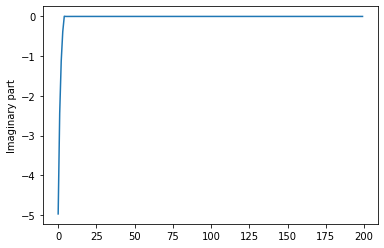

In [135]:
z=10.0 - 10.0j
label = str(z)[1:len(str(z))-1]
r=[]
i=[]

for k in range(200):
  dz = df_3(z)
  z = z - f_3(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form $z=-10.0 + 10.0j$

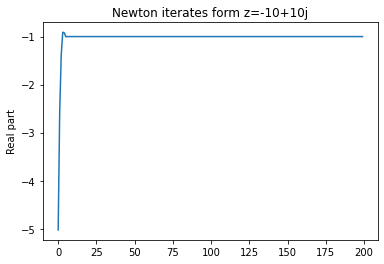

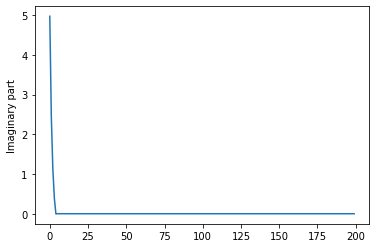

In [136]:
z=-10.0 + 10.0j
label = str(z)[1:len(str(z))-1]
r=[]
i=[]

for k in range(200):
  dz = df_3(z)
  z = z - f_3(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form $z=-10.0 - 10.0j$

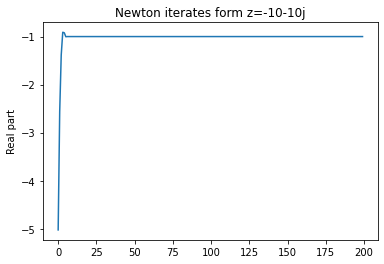

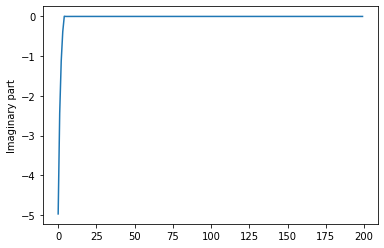

In [137]:
z=-10.0 - 10.0j
label = str(z)[1:len(str(z))-1]
r=[]
i=[]

for k in range(200):
  dz = df_3(z)
  z = z - f_3(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form $z=0.0 + 0.0j$

Division by 0


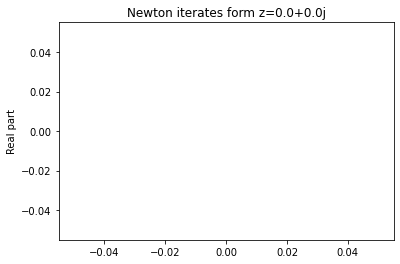

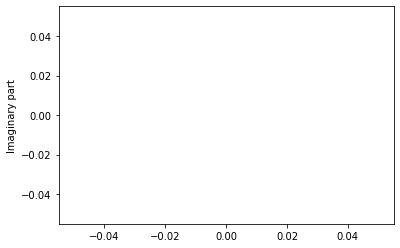

In [138]:
z=0.0 + 0.0j
label = "0.0+0.0j"
r=[]
i=[]

for k in range(200):
  dz = df_3(z)
  try:
    z = z - f_3(z) / dz # Newton iteration
  except:
    print("Division by 0")
    break
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### **Análisis**

Se puede observar que en la parte real, la gráfica convergerá a 1 si $z>0$, pero si $z<0$, la gráfica entonces convergerá a -1. En cambio, en la parte imaginaria, la gráfica convergerá a 0 sin importar el signo. En $z = 0.0 + 0.0j$ se generará un error de división por 0, dado que al asignar la iteracion de Newton z = z - f(z)/dz tenemos que dz es $2z=0$.

### $f(z) = z^2 + 1$

#### Newton iterates form $z=10.0 + 10.0j$

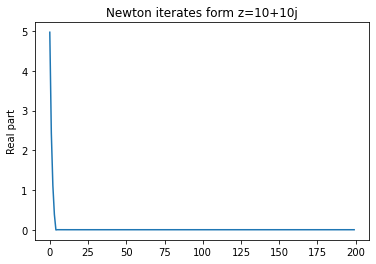

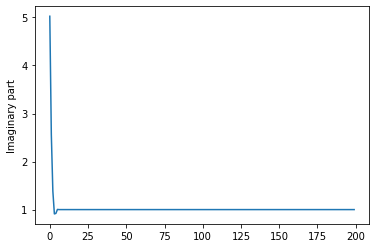

In [139]:
z=10.0 + 10.0j
label = str(z)[1:len(str(z))-1]
r=[]
i=[]

for k in range(200):
  dz = df_4(z)
  z = z - f_4(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form $z=10.0 - 10.0j$

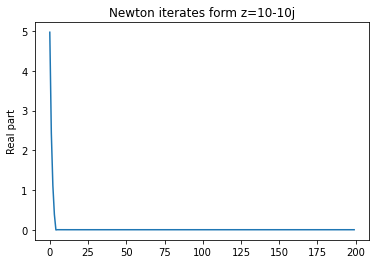

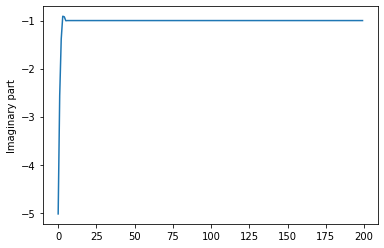

In [140]:
z=10.0 - 10.0j
label = str(z)[1:len(str(z))-1]
r=[]
i=[]

for k in range(200):
  dz = df_4(z)
  z = z - f_4(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form $z=-10.0 + 10.0j$

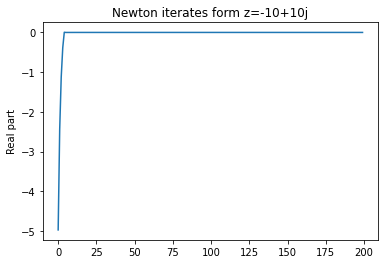

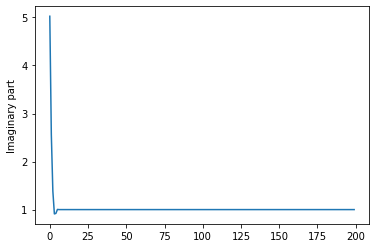

In [141]:
z=-10.0 + 10.0j
label = str(z)[1:len(str(z))-1]
r=[]
i=[]

for k in range(200):
  dz = df_4(z)
  z = z - f_4(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form $z=-10.0 - 10.0j$

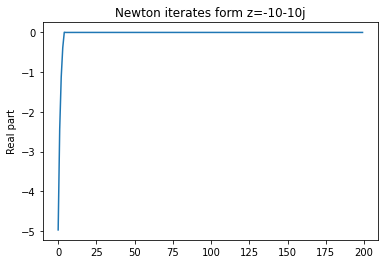

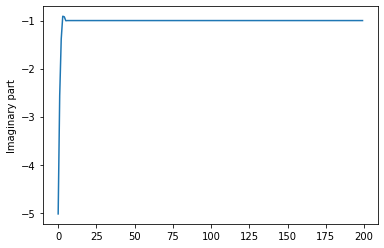

In [142]:
z=-10.0 - 10.0j
label = str(z)[1:len(str(z))-1]
r=[]
i=[]

for k in range(200):
  dz = df_4(z)
  z = z - f_4(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form $z=0.0 + 0.0j$

Division by 0


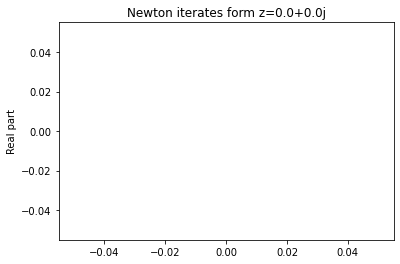

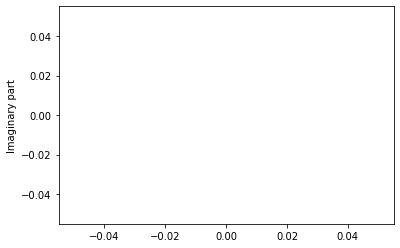

In [143]:
z=0.0 + 0.0j
label = "0.0+0.0j"
r=[]
i=[]

for k in range(200):
  dz = df_4(z)
  try:
    z = z - f_4(z) / dz # Newton iteration
  except:
    print("Division by 0")
    break
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z='+label)
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### **Análisis**

Se puede observar que en la parte imaginaria, la gráfica convergerá a 1 si $z>0$, pero si $z<0$, la gráfica entonces convergerá a -1. En cambio, en la parte real, la gráfica convergerá a 0 sin importar el signo. En $z = 0.0 + 0.0j$ se generará un error de división por 0, dado que al asignar la iteracion de Newton z = z - f(z)/dz tenemos que dz es $2z=0$.